<a href="https://colab.research.google.com/github/lailaabukhalaf/lailaabukhalaf/blob/main/thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

why we use torch ?

* Building and training neural networks

* Handling tensors (multi-dimensional arrays like NumPy, but faster and GPU-ready)

* Performing automatic differentiation (for backpropagation)

**torchvision is a companion package for image tasks**

It includes:

Popular datasets (MNIST, CIFAR-10, ImageNet)

Image transforms (resize, normalize, augment)

Pre-trained models (ResNet, VGG, etc.)






In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


**Transform function**

the transform is a preprocessing function (or a chain of functions) that you apply automatically to every image when it's loaded.

every time you load an image, do this to it before giving it to my model.


What kind of things can transform do?

* Convert images to tensors (ToTensor())

* Normalize pixel values (Normalize(mean, std))

* Resize, crop, or flip images

* Augment images (e.g., rotate, change brightness, zoom)

* Chain multiple steps together with transforms.Compose([...])




In [ ]:


# Define transformations (convert to tensor and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to [0,1] tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Mean and std of MNIST
])


what does tranformer do ?  example from raw to after transformation ( convert them to tensors and also normalize)

In [ ]:
#Define transformations
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize((0.1307,), (0.3081,))

#Load MNIST dataset without any transform
raw_dataset = datasets.MNIST(root="./data", train=True, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 57.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.99MB/s]


In [ ]:
image, label = raw_dataset[0]  # Get the first image
image

In [ ]:
# Apply ToTensor and Normalize separately
image_tensor = to_tensor(image)
image_normalized = normalize(image_tensor)

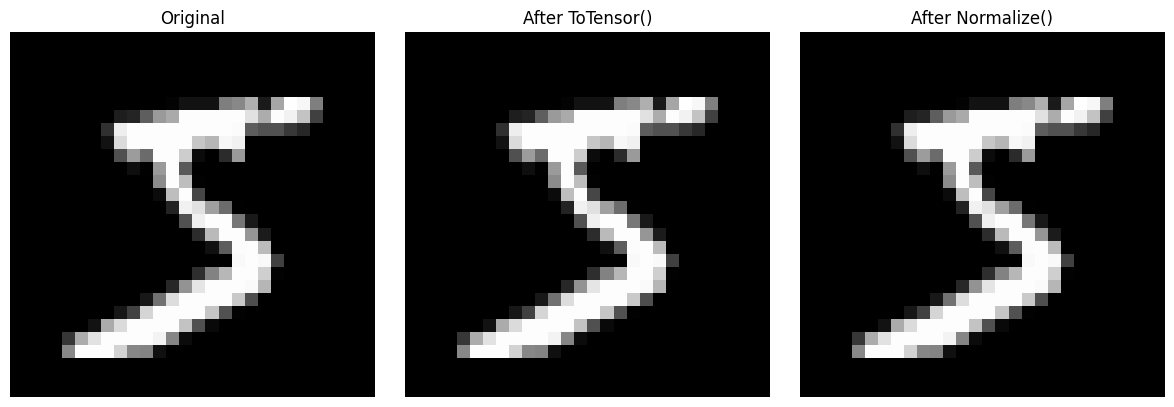

In [ ]:
# Visualize all three versions
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Original image
axs[0].imshow(image, cmap="gray")
axs[0].set_title("Original")
axs[0].axis("off")

# After ToTensor (still looks normal)
axs[1].imshow(image_tensor.squeeze(), cmap="gray")
axs[1].set_title("After ToTensor()")
axs[1].axis("off")

# After Normalize (looks weird but it's expected)
axs[2].imshow(image_normalized.squeeze(), cmap="gray")
axs[2].set_title("After Normalize()")
axs[2].axis("off")

plt.tight_layout()
plt.show()



why do that ?

Because raw images (like PNG or JPEG files) can't be directly used in neural networks. We need to:

Convert them to tensors

Scale or normalize values

Make sure they’re the same size and format to fit it in the model

For any model we need to have

* Training Data
* Testing Data

train = True meaning this data is for training

train = false.  - for testing


then we need to apply the transformation on the dataset


In [ ]:
# Download the training and test datasets
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

In [ ]:
test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

#Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


shuffle=True, it means the data will be randomly shuffled at the beginning of each training epoch.

Why shuffle?

Prevents the model from learning the order of the data.

Improves generalization.

Especially useful when your data might have some order (e.g., grouped by class).


- shuffle=True → randomly rearrange the training data every epoch.

- shuffle=False → keep the order as is (used for test/validation).

batch_size=64: The data will be split into mini-batches of 64 samples. This helps improve training speed and generalization.

Efficient memory usage: Data is loaded in chunks (batches) instead of all at once.

Easy iteration: we can loop through train_loader or test_loader using a for loop.

In [ ]:

#Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Grayscale 	    1 channel

RGB            	3 channels (Red, Green, Blue)

Conv2d(1, 32, kernel_size=3)

Conv2d(32, 64, kernel_size=3)

filter size 3*3 go through each input
Input: 32 channels (from previous layer)

Output: 64 channels (64 learned filters)



why its 8 16 32 64


GPUs and CPUs are optimized for powers of 2 because of how memory is stored and accessed.

Powers of 2 align well with hardware (e.g., 8-bit, 16-bit, 32-bit memory blocks), which makes matrix operations faster.

As you go deeper in the network, each layer captures more abstract features. 32-> 64-> 128,...


So you increase the number of filters to capture more complexity.

Can we Use 7 or 10?
Yes, you technically can. PyTorch lets you do this:

Conv2d(1, 7, kernel_size=3)

It will work! But:

You’ll lose some hardware speed benefits.

It's uncommon, so harder to compare your architecture with others.



In [8]:
from torch import nn
import sys
import torch.nn.functional as F

nn is used for layers (like Conv2d, Linear).

F gives access to functional APIs (like F.relu, F.log_softmax)


